<a href="https://colab.research.google.com/github/Camila28Lopez/Laboratorio07_IA_SIS420/blob/main/Lab07_IA_LopezCamachoCamila_Salome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import os 
import numpy as np
import pandas  as pd
from google.colab import drive
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

In [25]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
Data = pd.read_csv("/content/drive/MyDrive/Dataset/laptop_price.csv", encoding='ISO-8859-1')

Data = np.array(Data)
x= Data[:, 0]
y =Data[:, 12]

m = y.size
print(x)
print(y)
print(m)

[1 2 3 ... 1318 1319 1320]
[1339.69 898.94 575.0 ... 229.0 764.0 369.0]
1303


In [57]:
def grafica(x, y):
      fig = pyplot.figure()  
      pyplot.plot(x, y, 'ro', ms=10, mec='k')
      #pyplot.ylabel('casos')
      #pyplot.xlabel('años')
   



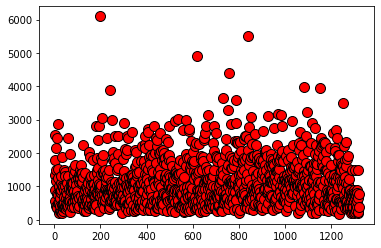

In [58]:
grafica(x,y)

In [59]:
pyplot.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [61]:
x = np.stack([np.ones(m), x], axis=1)

In [62]:
print(x)

[[1.0 1]
 [1.0 2]
 [1.0 3]
 ...
 [1.0 1318]
 [1.0 1319]
 [1.0 1320]]


In [63]:
def computeCost(x, y, theta):
    m = x.size 
    J = 0
    h = np.dot(x, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(x, theta) - y))
    return J

In [64]:
J = computeCost(x, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)

J = computeCost(x, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)


Con theta = [0, 0] 
 Costo calculado = 437727.78
Con theta = [-1, 2]
 Costo calculado = 258748.55


In [65]:
def gradientDescent(x, y, theta, alpha, num_iters):
  
    m = y.shape[0]
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(x, theta) - y).dot(x)
        J_history.append(computeCost(x, y, theta))
    
    return theta, J_history

In [86]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 1000
alpha = 0.000001

theta, J_history = gradientDescent(x ,y, theta, alpha, iterations)
print(J_history[-1])
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))


189237.52198695226
Theta encontrada por descenso gradiente: 0.2617, 1.3076


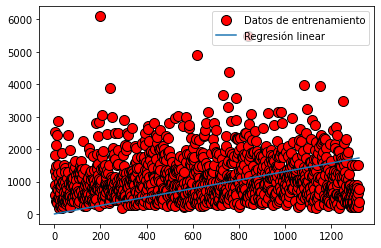

In [87]:
# grafica la linea de ajuste
grafica(x[:, 1], y)
pyplot.plot(x[:, 1], np.dot(x, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

In [95]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 5], theta)
print('Para 5 laptops , se predice un precio  de {:.2f}\n'.format(predict1*1000))

predict2 = np.dot([1, 10], theta)
print('Para 10 laptops , se predice un precio  de {:.2f}\n'.format(predict2*1000))

Para 5 laptops , se predice un precio  de 6799.70

Para 20 laptops , se predice un precio  de 13337.68

